Analyzing Hospital Readmission Rates

Missing values after filled data=  time_in_hospital                            0
n_lab_procedures                            0
n_procedures                                0
n_medications                               0
n_outpatient                                0
n_inpatient                                 0
n_emergency                                 0
age_[50-60)                                 0
age_[60-70)                                 0
age_[70-80)                                 0
age_[80-90)                                 0
age_[90-100)                                0
medical_specialty_Emergency/Trauma          0
medical_specialty_Family/GeneralPractice    0
medical_specialty_InternalMedicine          0
medical_specialty_Missing                   0
medical_specialty_Other                     0
medical_specialty_Surgery                   0
diag_1_Diabetes                             0
diag_1_Digestive                            0
diag_1_Injury                               0

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


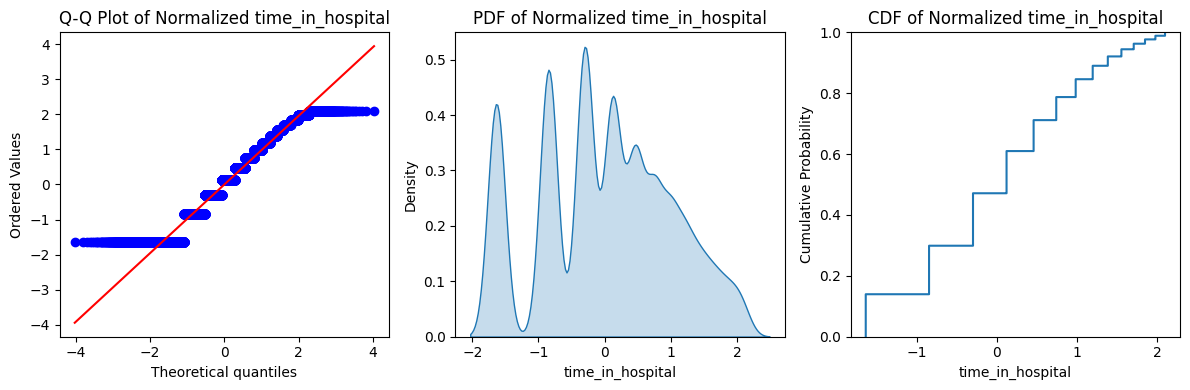

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


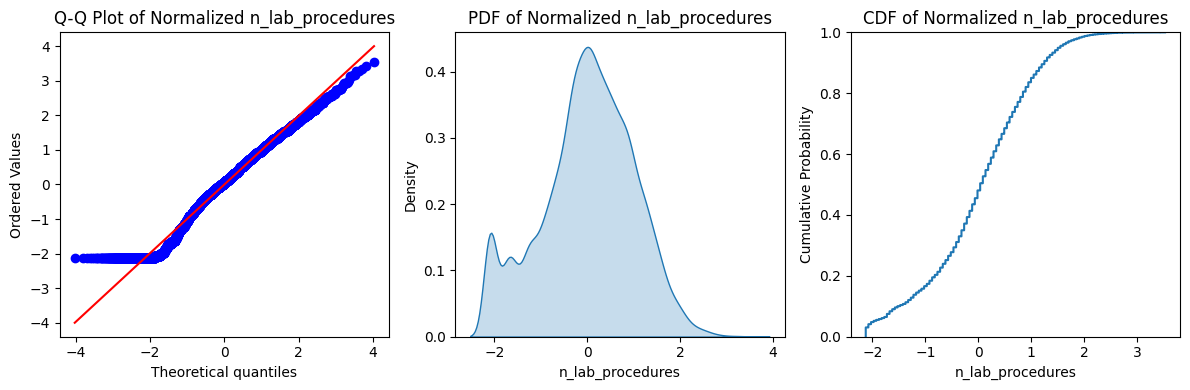

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


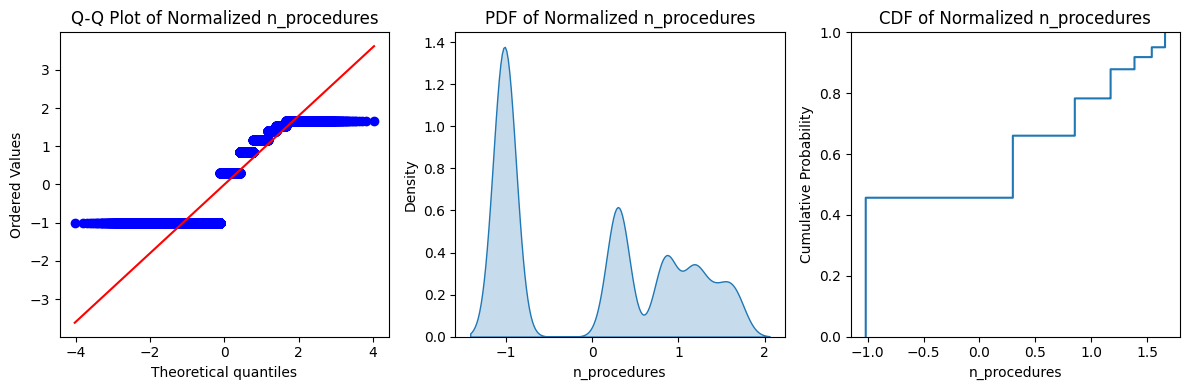

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


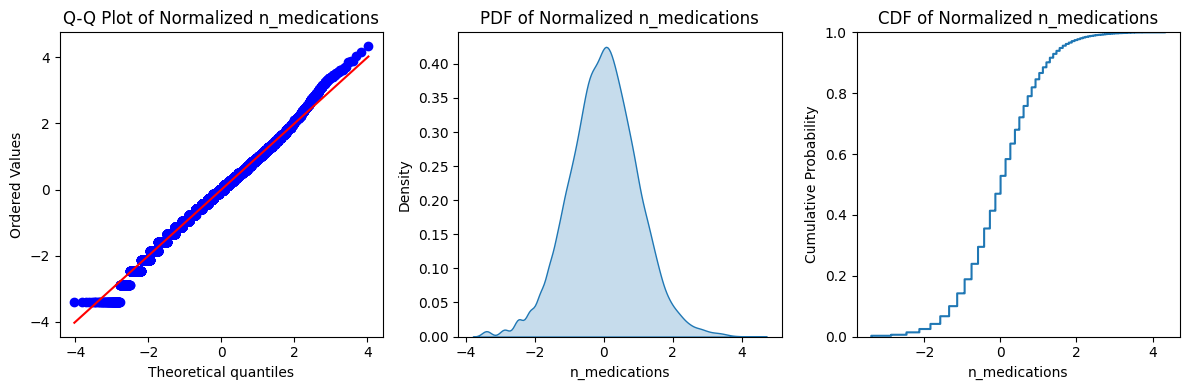

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


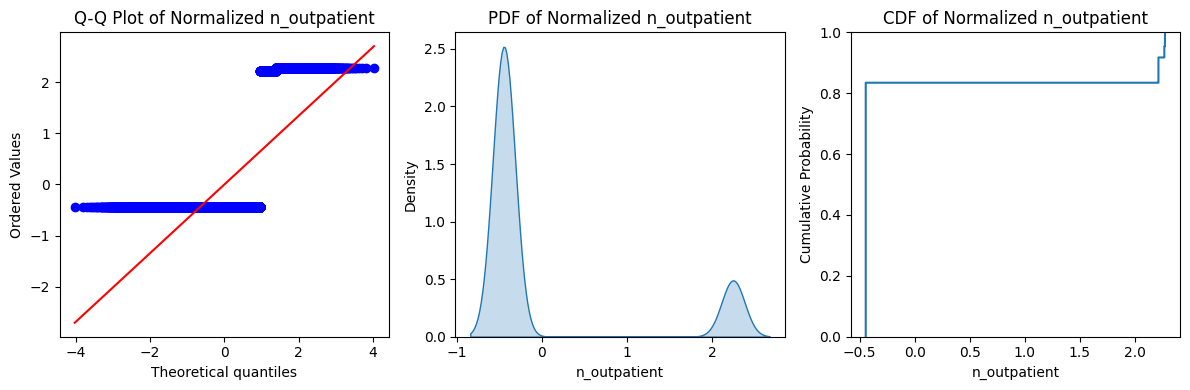

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


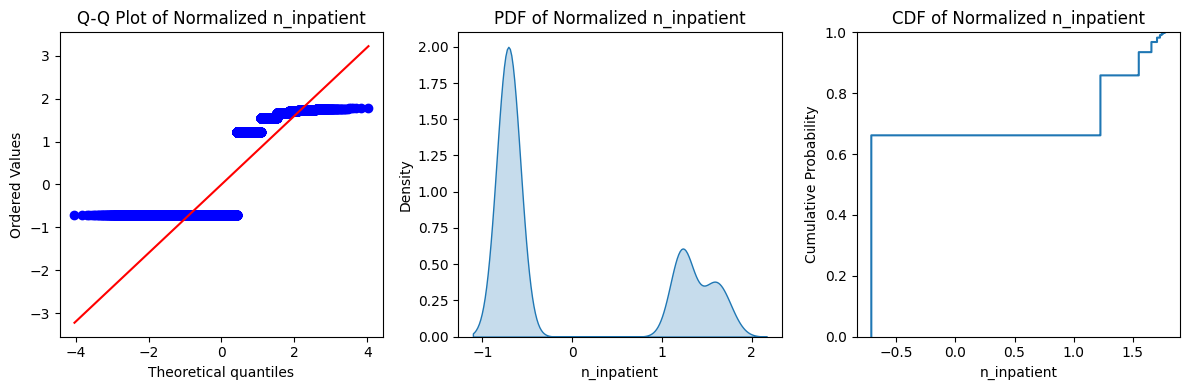

C:\Users\Humna Khan\AppData\Local\Temp\ipykernel_15340\2678739921.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalizedData[col], shade=True)


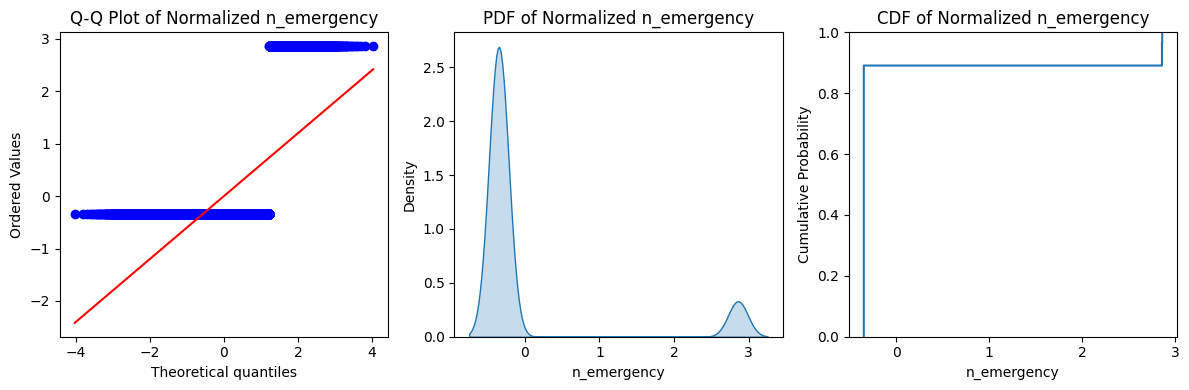

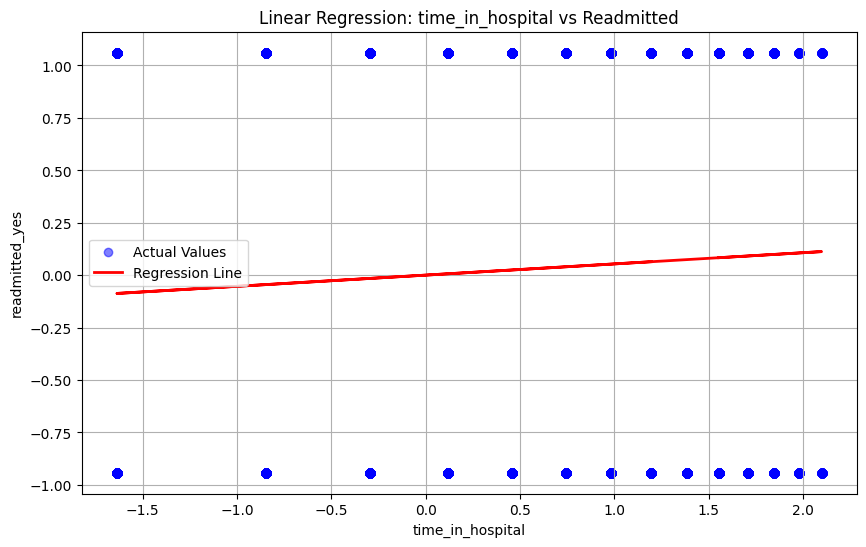

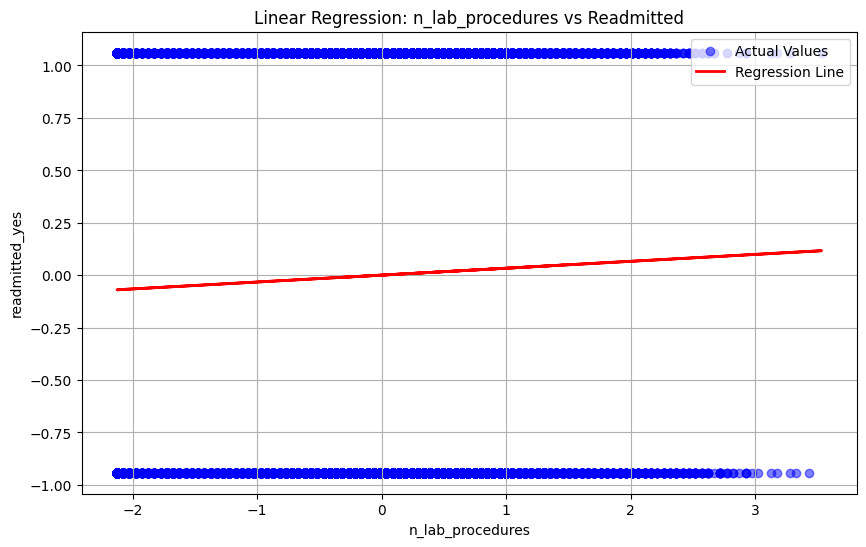

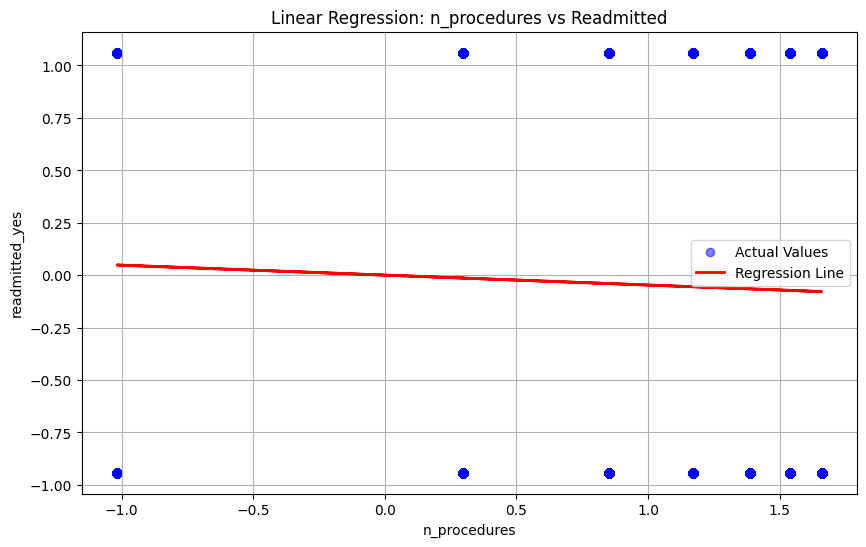

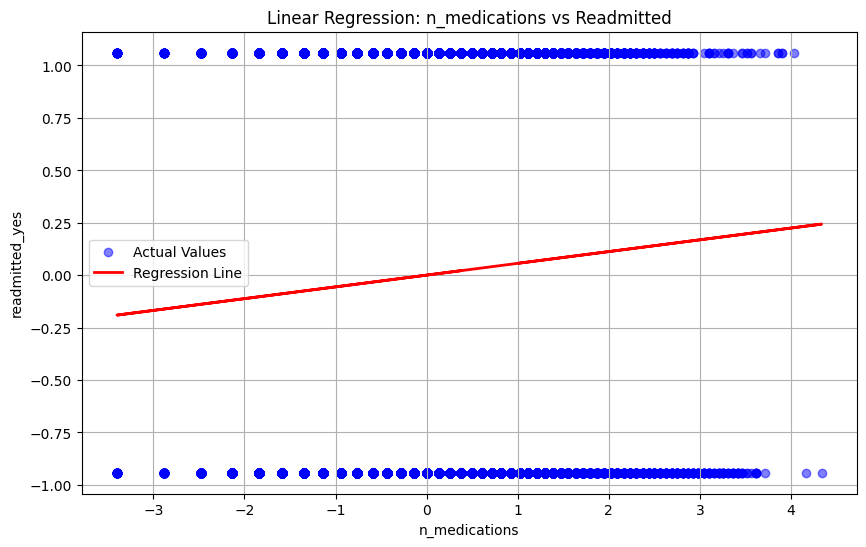

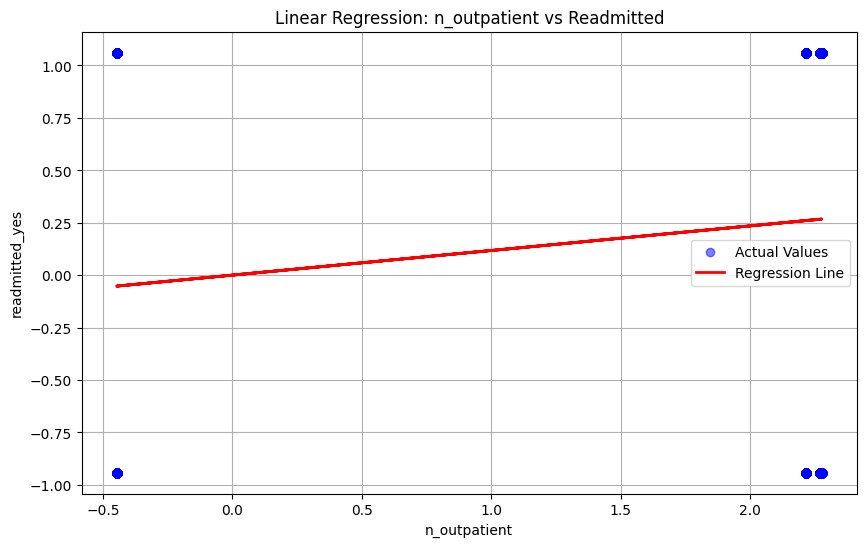

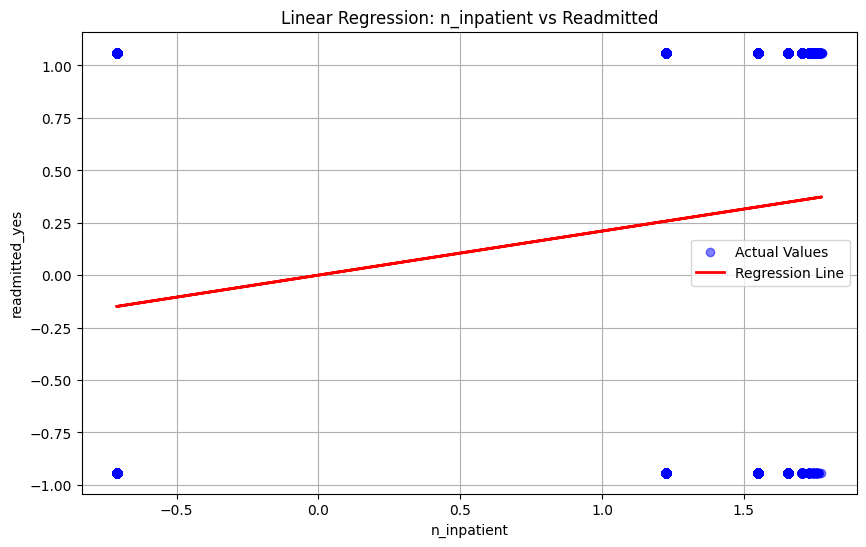

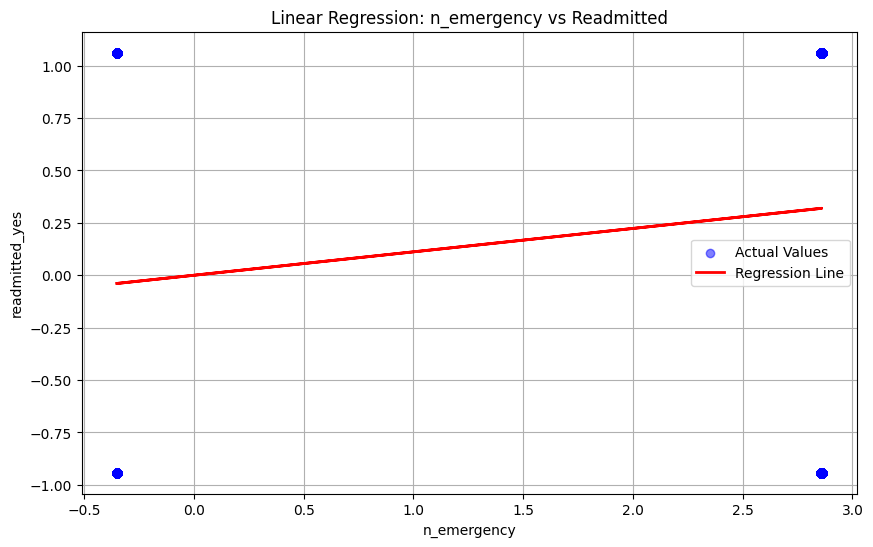

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("hospital_readmissions.csv")

# Drop rows with missing values
data = data.dropna()

# Fill missing values with mean for numeric columns
numericColumnsMean = data.select_dtypes(include=[float, int]).mean()
filledData = data.fillna(numericColumnsMean)

# One-hot encode categorical columns
categoricalCols = filledData.select_dtypes(include=['object', 'category']).columns
filledData = pd.get_dummies(filledData, columns=categoricalCols, drop_first=True)

# Descriptive analysis
print("Missing values after filled data= ", filledData.isnull().sum())
print(filledData.head())
descriptiveAnalysis = filledData.describe()
print("Descriptive Analysis")
print(descriptiveAnalysis)

# Normalize the data using PowerTransformer (which is robust to non-normal data)
scaler = PowerTransformer(method='yeo-johnson')  # Use Yeo-Johnson method
normalizedData = scaler.fit_transform(filledData)

# Convert normalized data back to DataFrame
normalizedData = pd.DataFrame(normalizedData, columns=filledData.columns)

# Selected columns for analysis
selected_columns = [
    'time_in_hospital', 
    'n_lab_procedures', 
    'n_procedures', 
    'n_medications', 
    'n_outpatient', 
    'n_inpatient', 
    'n_emergency'
]

# Perform normality analysis for selected columns
for col in selected_columns:
    plt.figure(figsize=(12, 4))
    
    # Q-Q Plot of normalized data
    plt.subplot(1, 3, 1)
    stats.probplot(normalizedData[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Normalized {col}')
    
    # Probability Density Function
    plt.subplot(1, 3, 2)
    sns.kdeplot(normalizedData[col], shade=True)
    plt.title(f'PDF of Normalized {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    # Cumulative Distribution Function
    plt.subplot(1, 3, 3)
    sns.ecdfplot(normalizedData[col])
    plt.title(f'CDF of Normalized {col}')
    plt.xlabel(col)
    plt.ylabel('Cumulative Probability')
    
    plt.tight_layout()
    plt.show()

# Define the target
target = 'readmitted_yes'

# Plot linear regression line for each selected feature
for feature in selected_columns:
    X = normalizedData[[feature]]
    y = normalizedData[target]
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the values
    y_pred = model.predict(X)
    
    # Plotting the linear regression line for the selected feature
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, color='blue', label='Actual Values')
    plt.plot(X, y_pred, color='red', linestyle='-', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression: {feature} vs Readmitted')
    plt.xlabel(feature)
    plt.ylabel('readmitted_yes')
    plt.legend()
    plt.grid(True)
    plt.show()
